**과제 1.**

타이타닉 데이터 세트를 이용하여
* SGD분류,
* 결정트리,
* 랜덤포래스트,
* 히스토그램기반 그래디언트 부스팅

모델을 만들고 최적화.

---

기본값으로 모델을 생성하고, 최적화를 진행할 것.

* random_state는 자신의 학번으로 설정.

입력 데이터도 적절히 수정할 것.

* NaN(Not A Number) 값을 어떻게 처리했는가?

* 왜 이렇게 훈련 및 테스트 세트를 만들었는가?

수행한 최적화 방법을 단계별로 자세히 설명할 것.

* 왜 이런 파리미터를 수정하는가?

* 왜 이렇게 파라미터 범위를 정했는가?

* 왜 이런 파라미터를 최종적으로 선택했는가?

위에 언급한 것 말고도 다양한 방법을 사용해 볼 것.

모델을 만들고 난 후에도 필요하면 입력 데이터를 수정하여 다시 모델을 만들 수 있음.

* 특성 공학 이용
---

**주의!!!**

다운받은 파일 수정 금지 및 모든 데이터 사용할 것.

그러나 변수로 지정된 데이터는 수정가능.

파일 /content/drive/MyDrive/Colab Notebooks/에 업로드하여 사용할 것.

* 예) titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")

random_state는 자신의 학번으로 설정.

10/15일까지 자신의 GitHub에 업로드할 것.

---

타이타닉 데이터 세트 (이진분류)

https://www.kaggle.com/competitions/titanic/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
train_data =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv', index_col = 0)
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv', index_col = 0)

PassengerId : 승객 ID

Survived:  0은 죽었다는 의미, 1은 생존의 의미

Pclass : 좌석 등급

Name : 승객 이름

Age : 승객 나이

SibSp: 함께 탑승한 형제 자매 또는 배우자의 수

Parch: 함께 탑승한 부모, 아이의 수

Ticket : 티켓 번호

Fare : 티켓 가격

Cabin: 객실 번호

Embarked : 탑승 항구

In [17]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [18]:
test_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Cabin     91 non-null     object 
 10  Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


# EDA

Text(0.5, 1.0, 'survived count')

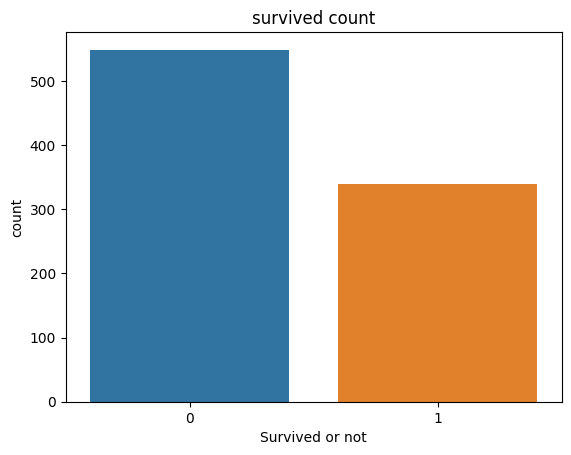

In [56]:
sns.countplot(data = train_data, x="Survived")
plt.xlabel("Survived or not")
plt.ylabel("count")
plt.title("survived count")

Text(0.5, 1.0, 'Sex_Pclass')

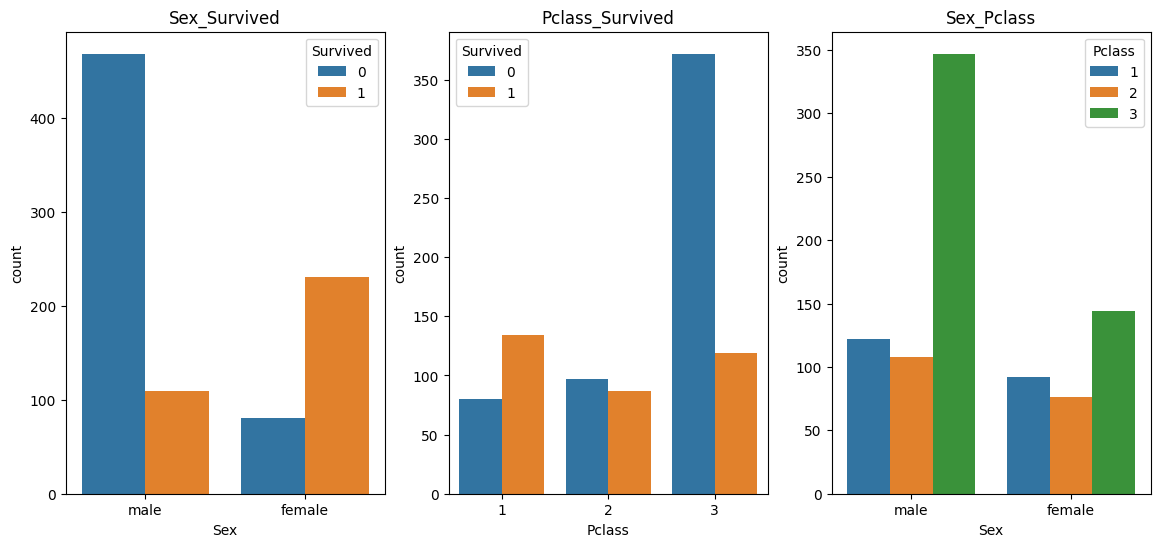

In [57]:
figure = plt.figure(figsize=(14,6))
ax1 = plt.subplot(1,3,1)
sns.countplot(x="Sex", hue="Survived", data = train_data, ax = ax1)
plt.title("Sex_Survived")
ax2 = plt.subplot(1,3,2)
sns.countplot(x="Pclass", hue="Survived", data = train_data, ax = ax2)
plt.title("Pclass_Survived")
ax3 = plt.subplot(1,3,3)
sns.countplot(x="Sex", hue="Pclass", data = train_data, ax = ax3)
plt.title("Sex_Pclass")

# data 결측치 탐지

In [19]:
print('Invalid values in train = {}'.format(train_data.isnull().values.sum()))
train_data.isnull().sum()

Invalid values in train = 866


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
print('Invalid values in train = {}'.format(test_data.isnull().values.sum()))
test_data.isnull().sum()

Invalid values in train = 414


Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

객실 번호를 의미하는 Cabin 데이터는 모델의 예측에 영향이 크지 않을 것으로 판단하여 삭제합니다.

마찬가지로 모델의 예측에 영향이 적을 것으로 판단되는 Name 데이터와 Ticket 데이터 제거



In [23]:
train_data = train_data.drop(['Cabin', 'Name','Ticket'], axis =1)
test_data = test_data.drop(['Cabin', 'Name','Ticket'], axis =1)

Age 데이터는 모델의 예측에 영향을 줄 수 있는 데이터이므로 데이터의 결측치를 평균값으로 대체합니다

In [24]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

train_data의 Embarked는 2개의 결측치가 있으므로 결측치가 있는 데이터를 제거합니다.
test_data의 Fare는 1개의 결측치가 존재하므로 결측치가 있는 데이터 제거합니다

In [25]:
print('Invalid values in train = {}'.format(train_data.isnull().values.sum()))
train_data.isnull().sum()
train_data = train_data.dropna()
test_data = test_data.dropna()

Invalid values in train = 2


In [26]:
print('Invalid values in train = {}'.format(train_data.isnull().values.sum()))
train_data.isnull().sum()

Invalid values in train = 0


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    object 
 3   Age       417 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  417 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB


# 데이터를 X_train 데이터와 X_target 데이터로 나누어준다

In [63]:
X_train = train_data.drop(['Survived'], axis = 1)
y_train = train_data['Survived']


X_test = test_data.drop(['Survived'], axis = 1)
y_test = test_data['Survived']

# 문자 데이터 숫자로 변환

In [64]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [65]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
X_train['Sex_label(f,m)'] = label.fit_transform(X_train['Sex'])
X_train['Embarked_label(C,Q,S)'] = label.fit_transform(X_train['Embarked'])
X_train = X_train.drop(['Sex'], axis = 1)
X_train = X_train.drop(['Embarked'], axis = 1)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,"Sex_label(f,m)","Embarked_label(C,Q,S)"
PassengerId,,,,,,,
1,3,22.0,1,0,7.2500,1,2
2,1,38.0,1,0,71.2833,0,0
3,3,26.0,0,0,7.9250,0,2
4,1,35.0,1,0,53.1000,0,2
5,3,35.0,0,0,8.0500,1,2


In [66]:
label = LabelEncoder()
X_test['Sex_label(f,m)'] = label.fit_transform(X_test['Sex'])
X_test['Embarked_label(C,Q,S)'] = label.fit_transform(X_test['Embarked'])
X_test = X_test.drop(['Sex'], axis = 1)
X_test = X_test.drop(['Embarked'], axis = 1)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,"Sex_label(f,m)","Embarked_label(C,Q,S)"
PassengerId,,,,,,,
892,3,34.5,0,0,7.8292,1,1
893,3,47.0,1,0,7.0000,0,2
894,2,62.0,0,0,9.6875,1,1
895,3,27.0,0,0,8.6625,1,2
896,3,22.0,1,1,12.2875,0,2


# data 정규화

In [67]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

# SGD 분류

In [74]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((889, 7), (889,), (417, 7), (417,))

In [72]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter = 1000, random_state = 36)
sc.fit(X_train, y_train)
print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))


0.796400449943757
0.9328537170263789


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


test 데이터와 비교하여 train 데이터의 정확도가 낮은 편 : 과소적합 상태

In [77]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(y_train)
for _ in range(0,300):
    sc.partial_fit(X_train, y_train, classes = classes)
    train_score.append(sc.score(X_train, y_train))
    test_score.append(sc.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


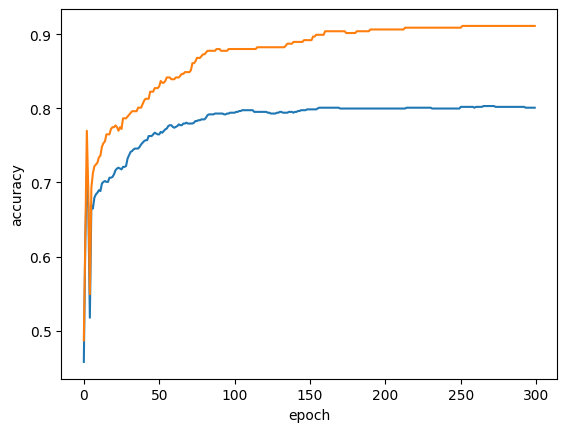

In [78]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

epoch에 따른 train, test 데이터의 정확도에서 epoch가 100 이상일 때 test 데이터의 정확도가 더이상 증가하지 않으며 train 데이터의 정확도는 높아지는 과대적합 현상이 심해지는 것을 확인할 수 있다.

그러므로 max_iter를 100으로 하여 tol = None 옵션을 부여한다.

In [91]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None,  random_state = 36)
sc.fit(X_train, y_train)
print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))

0.7952755905511811
0.9592326139088729


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 36)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9820022497187851
0.7769784172661871


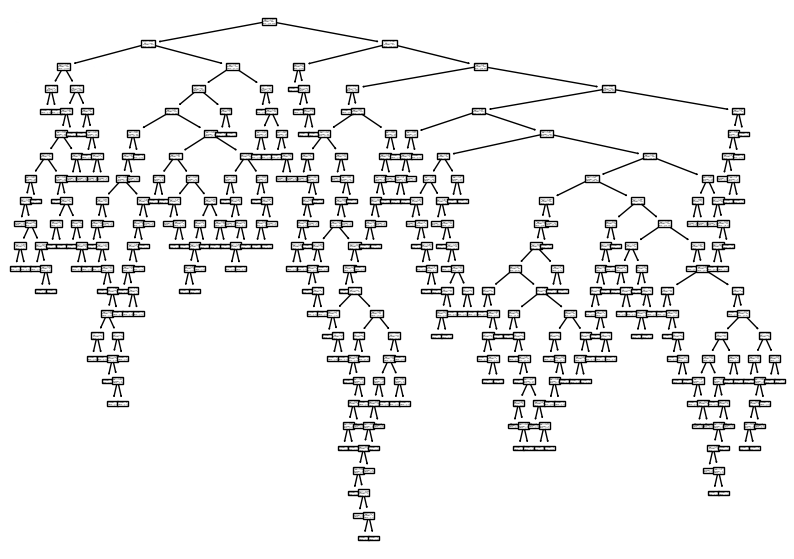

In [93]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [94]:
# 최대 깊이 규제
dt = DecisionTreeClassifier(max_depth = 3, random_state = 36)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.8267716535433071
0.9664268585131894


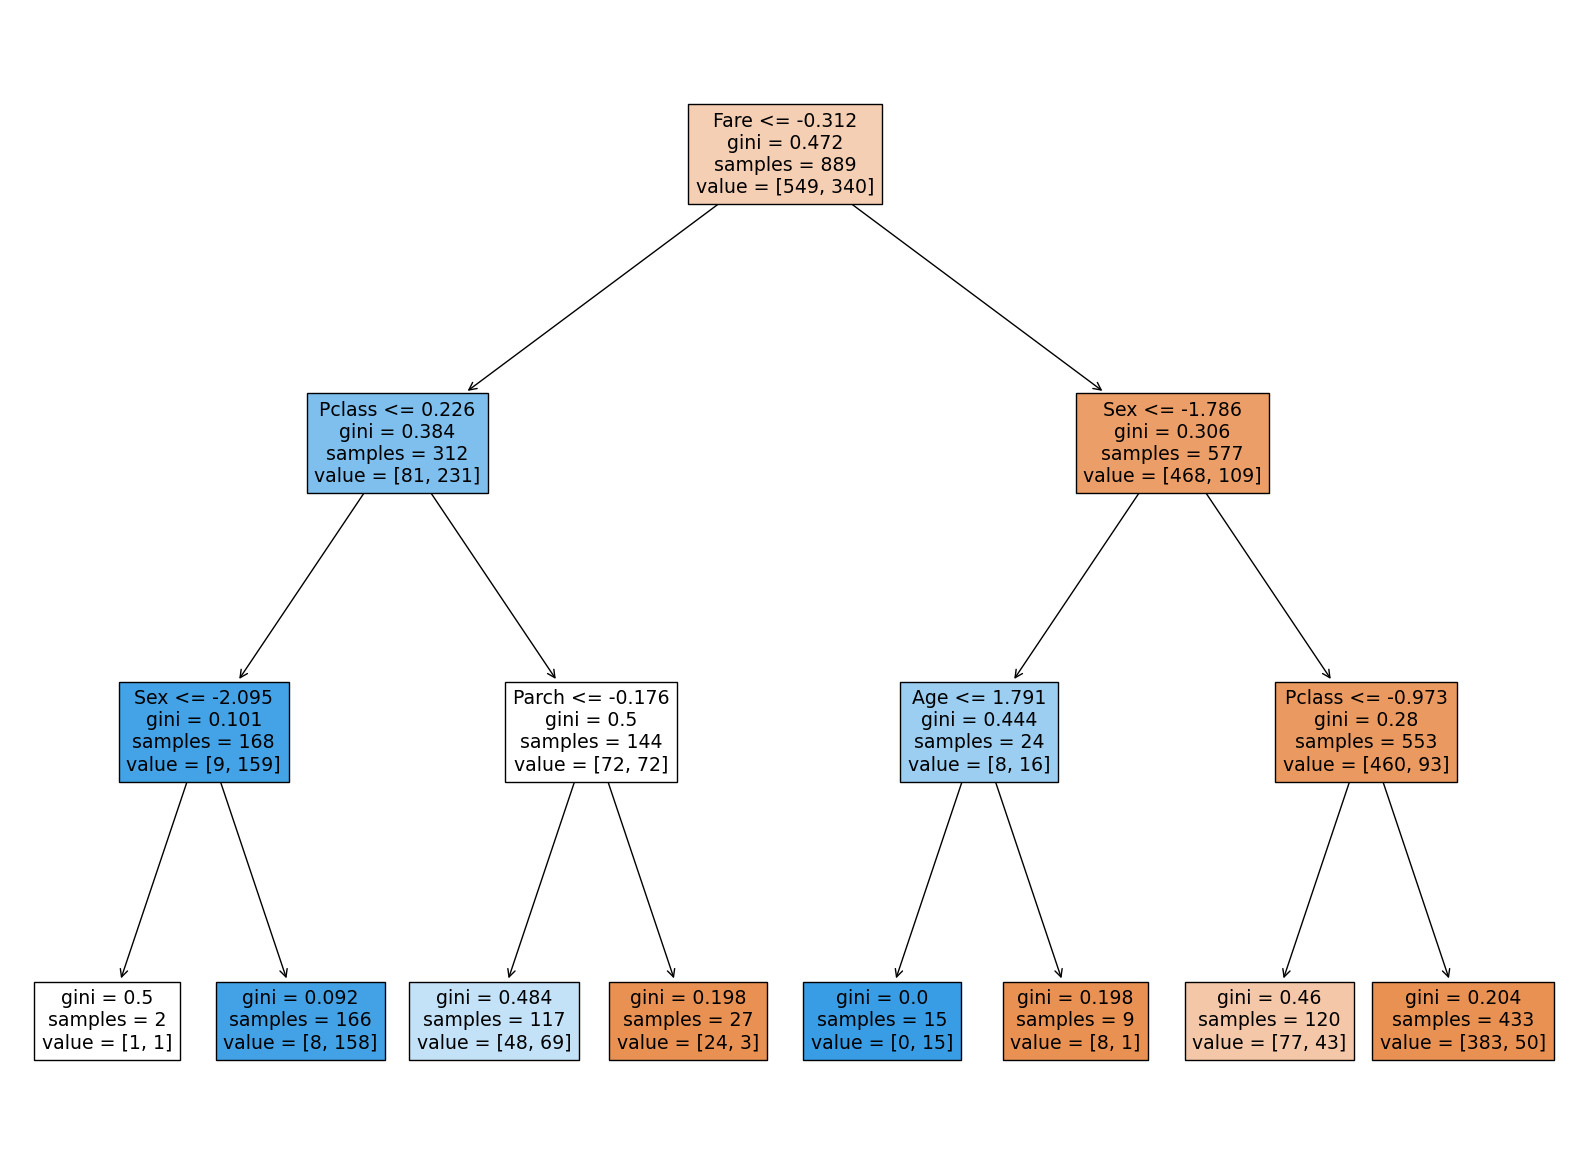

In [103]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'])
plt.show()

# 교차 검증

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 36)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9820022497187851
0.7769784172661871


In [106]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, X_train, y_train)
print(scores)
import numpy as np
print(np.mean(scores['test_score']))

{'fit_time': array([0.01310754, 0.01288414, 0.01134682, 0.00460124, 0.00387859]), 'score_time': array([0.00131488, 0.00144935, 0.00671482, 0.00127387, 0.00116062]), 'test_score': array([0.75842697, 0.75842697, 0.79775281, 0.73595506, 0.8079096 ])}
0.7716942804545166


In [107]:
from sklearn.model_selection import StratifiedKFold
for i in range(2, 11):
    best_score = 0
    best_fold = 0
    splitter = StratifiedKFold(n_splits = i, shuffle =True, random_state = 42)
    scores = cross_validate(dt, X_train, y_train, cv = splitter)
    if np.mean(scores['test_score']) > best_score:
        best_fold = i
    print(i, np.mean(scores['test_score']))

print('best_fold = ', i)

2 0.7829056584674562
3 0.7761170261170262
4 0.7794812749969702
5 0.7739097314797181
6 0.7828466049942561
7 0.7795275590551182
8 0.759240267052767
9 0.7818433770814723
10 0.7773110316649643
best_fold =  10


K fold 교차검증을 수행해 보았으며, 데이터를 몇개의 부분으로 나누는 것이 가장 좋은지를 알아보기 위해 1부터 10 까지 수행해 보았다.

정확도에서 큰 차이를 보이지 않았으나 가장 좋은 파라미터는 10임을 알 수 있었다

# 하이퍼 파라미터 튜닝(GridSearch)

결정 트리의 하이퍼 파라미터를 튜닝하는 과정으로,
불순도의 최소 감소량, 최대 깊이 제한, 분류 최소 샘플 수 파라미터를 튜닝해 보았다

In [120]:
params = {'min_impurity_decrease':np.arange(0.0001, 0.001, 0.0001), # 불순도 감소 최소량
         'max_depth': range(5,20,1), # 트리 깊이 제한
         'min_samples_split':range(2,100,10) #노드 나누는 최소 샘플 개수
         }

In [121]:
#하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(DecisionTreeClassifier(random_state = 36), params, n_jobs = -1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=36), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [122]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

{'max_depth': 10, 'min_impurity_decrease': 0.0009000000000000001, 'min_samples_split': 22}
0.8268012442074525


In [123]:
dt = gs.best_estimator_
print(dt.score(X_test, y_test))

0.8465227817745803


best parameter

max_depth: 10

min_impurity_decrease : 0.0009000000000000001,

min_samples_split: 22

## 랜덤 서치 그리드서치

In [114]:
from scipy.stats import uniform, randint
params = {'min_impurity_decrease':uniform(0.0001, 0.001),
         'max_depth': randint(20, 50),
         'min_samples_split':randint(2,25),
         'min_samples_leaf':randint(1,25),
         }

In [116]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=36, splitter = 'random'), params, n_iter = 100, n_jobs = -1, random_state = 36)
gs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=36,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc584960310>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dc584948970>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc584960f70>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc584960eb0>},
                   random_state=36)

In [117]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

{'max_depth': 28, 'min_impurity_decrease': 0.00030490313032866917, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.8177807401764744


In [119]:
dt = gs.best_estimator_
print(dt.score(X_test, y_test))

0.8249400479616307


best parameter
max_depth': 28

min_impurity_decrease: 0.00030490313032866917

min_samples_leaf: 2

min_samples_split: 8

# RandomForest

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 36)

In [126]:
scores = cross_validate(rf, X_train, y_train,
                        return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9845339686151805 0.8054275376118835


훈련 세트와 비교했을 때 검증 세트의 정확도가 좋지 않다

In [127]:
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.07628647 0.26543864 0.0512152  0.03829861 0.27036256 0.26507165
 0.03332687]


In [128]:
print(rf.score(X_test, y_test))

0.8033573141486811


# Extra Tree

In [129]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs = -1, random_state = 36)
scores = cross_validate(et, X_train, y_train,
                        return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))


0.9845339686151805 0.7953088300641147


In [130]:
et.fit(X_train, y_train)
print(et.feature_importances_)

[0.10607532 0.24708863 0.04362869 0.04160392 0.24063507 0.28962426
 0.0313441 ]


# 히스토그램 기반 그레이디언트 부스팅

In [131]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=36)
scores = cross_validate(hgb, X_train, y_train, return_train_score = True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9468508509932206 0.8313083222243381


In [133]:
from sklearn.inspection import permutation_importance
hgb.fit(X_train, y_train)
result = permutation_importance(hgb, X_train, y_train,
                               n_repeats = 10, random_state = 36, n_jobs = -1)
print(result.importances_mean)

[0.10461192 0.14263217 0.02564679 0.01214848 0.11822272 0.22598425
 0.02767154]


In [134]:
hgb.score(X_test, y_test)

0.829736211031175